In [7]:
import json
import logging
from argparse import Namespace
from pathlib import Path

import IPython
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy
import textgrid
import soundfile

from simuleval.utils.fairseq import get_audio_file_path

def plot_s2t(path, wav_index):
    mpl.rcParams['axes.spines.left'] = False
    mpl.rcParams['axes.spines.right'] = False
    mpl.rcParams['axes.spines.top'] = False
    mpl.rcParams['axes.spines.bottom'] = False

    path=Path(path)
    log_path = path / "instances.log"
    log_info = None

    with open(log_path) as f:
        for i, line in enumerate(f):
            if i == wav_index:
                log_info = json.loads(line) 
    assert log_info

    pred_wav_path = path / "wavs"/f"{wav_index}_pred.wav"
    source_samples, source_fs = soundfile.read(get_audio_file_path(log_info["source"]))

    x_max = log_info["delays"][-1] / 1000 + 1

    plt.figure(figsize=(25, 2))
    #for ax in axes:
    plt.yticks([])
    plt.xlim([0, x_max])
    plt.plot(numpy.linspace(0, len(source_samples) / source_fs , len(source_samples)), source_samples)
    curr_delay = 0
    offset = 0.1
    for index in range(len(log_info["delays"])):
        if log_info["delays"][index] == curr_delay:
            offset += 0.1
        plt.axvline(log_info["delays"][index] / 1000, c="r", alpha=0.3)
        plt.text(log_info["delays"][index] / 1000, offset, log_info["prediction"].split()[index], rotation=45)
        curr_delay = log_info["delays"][index] 


def plot_s2st(path, wav_index):
    mpl.rcParams['axes.spines.left'] = False
    mpl.rcParams['axes.spines.right'] = False
    mpl.rcParams['axes.spines.top'] = False
    mpl.rcParams['axes.spines.bottom'] = False

    path=Path(path)
    log_path = path / "instances.log"
    log_info = None

    with open(log_path) as f:
        for i, line in enumerate(f):
            if i == wav_index:
                log_info = json.loads(line) 
    assert log_info


    pred_wav_path = path / "wavs"/f"{wav_index}_pred.wav"
    target_samples, target_fs = soundfile.read(pred_wav_path)
    source_samples, source_fs = soundfile.read(get_audio_file_path(log_info["source"]))
    num_seconds = len(target_samples) / target_fs

    x_max = max(len(source_samples) / source_fs, len(target_samples) / target_fs) + log_info['prediction_offset'] / 1000

    fig, axes = plt.subplots(4, sharex=True, figsize=(25, 5))
    for ax in axes:
        ax.set_yticks([])

    axes[0].plot(numpy.linspace(0, len(source_samples) / source_fs , len(source_samples)), source_samples)

    axes[1].plot(log_info['prediction_offset'] / 1000 + numpy.linspace(0, len(target_samples) / target_fs , len(target_samples)), target_samples)
    align_info = textgrid.TextGrid.fromFile(path / "align" / f"{wav_index}_pred.TextGrid")
    for interval in align_info[0]:
        axes[1].axvline( log_info['prediction_offset'] / 1000 + interval.minTime, c="r", alpha=0.3)
        axes[1].axvline( log_info['prediction_offset'] / 1000 + interval.maxTime, c="r", alpha=0.3)
        axes[1].text(log_info['prediction_offset'] / 1000 + (interval.minTime), 0.2, interval.mark, rotation=45)

    start = end = 0
    for seg_index in range(len(log_info["intervals"])):
        
        start, duration = log_info["intervals"][seg_index]
        offset = log_info["delays"][seg_index]
   
        samples = target_samples[int((start - log_info['prediction_offset']) / 1000 * target_fs): int((start + duration - log_info['prediction_offset']) / 1000 * target_fs)]
   
        axes[2].plot( offset / 1000 + numpy.linspace(0, len(samples) / target_fs, len(samples)), - seg_index * 0.05 + numpy.array(samples))
        axes[3].plot( start / 1000 + numpy.linspace(0, len(samples) / target_fs, len(samples)), numpy.array(samples))


# Speech-to-Text

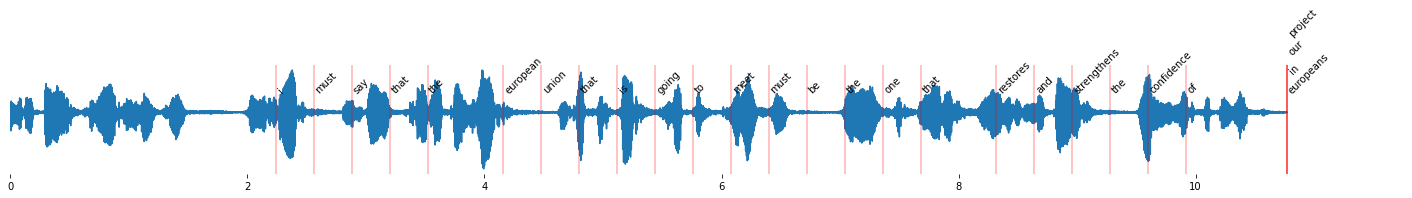

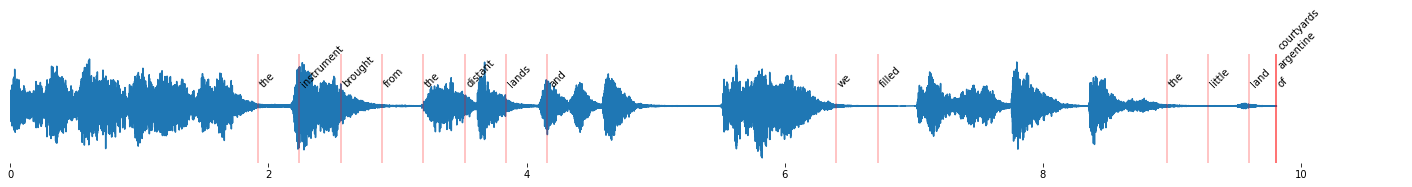

In [12]:
# Dev epst
path = "/large_experiments/seamless/ust/xutaima/2022_h2_streaming/tutorial/dev_epst_output-8-4"
index = 1
plot_s2t(path, index)

# Dev mtedx filt
path = "/large_experiments/seamless/ust/xutaima/2022_h2_streaming/tutorial/dev_mtedx_filt_output-8-4"
index = 1
plot_s2t(path, index)
   



# Speech-to-Speech

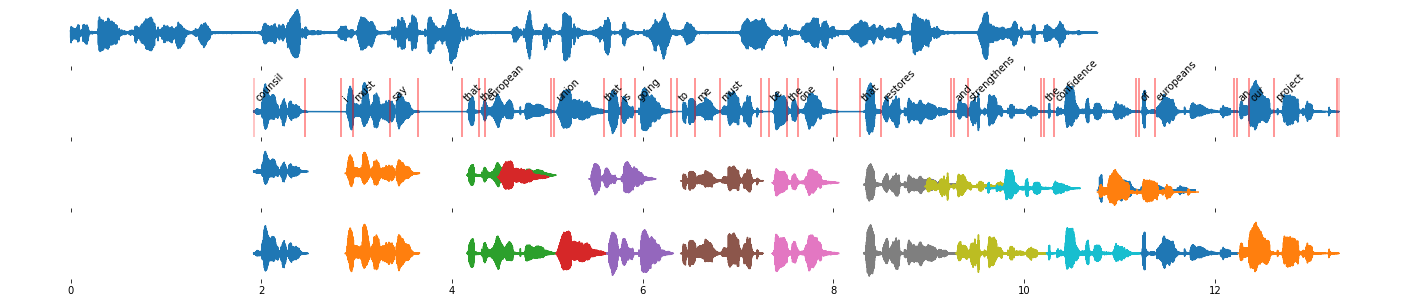

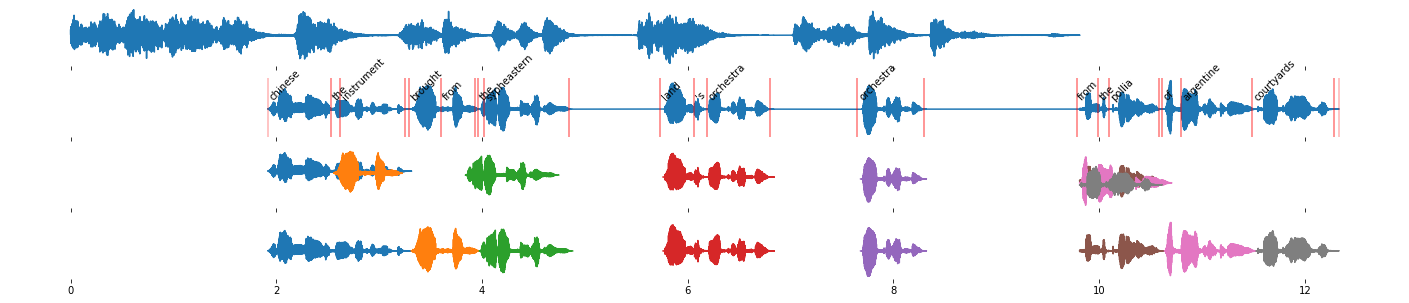

In [13]:

# dev_mtedx
path = "/large_experiments/seamless/ust/xutaima/2022_h2_streaming/tutorial/dev_epst-step_8-k_4-mp_6"
index = 1
plot_s2st(path, index)
IPython.display.Audio(Path(path) / "wavs" / f"{index}_pred.wav")

# dev_mtedx
path = "/large_experiments/seamless/ust/xutaima/2022_h2_streaming/cascaded_test_waitk_s2s/dev_mtedx_filt-step_8-k_3-mp_8"
index = 1
plot_s2st(path, index)
IPython.display.Audio(Path(path) / "wavs" / f"{index}_pred.wav")